In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 26 10:19:51 2018

@author: kruegkj

time_test_modelling.py
Goal: Test and verify in sample and out of sample time splits for dataset
"""
from Code.lib.plot_utils import PlotUtility
from Code.lib.time_utils import TimeUtility
from Code.lib.retrieve_data import DataRetrieve, ComputeTarget
from Code.utilities.stat_tests import adf_test, hurst_setup

import datetime
from dateutil.relativedelta import relativedelta
from pandas.tseries.offsets import BDay
import matplotlib.pylab as plt


plotIt = PlotUtility()
timeUtil = TimeUtility()
dSet = DataRetrieve()
ct = ComputeTarget()

issue = "tlt" 
pivotDate = datetime.date(2018, 4, 2)
is_oos_ratio = 4
oos_months = 3
segments = 3
    

        
        
        
        

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# get segmented dates
isOosDates = timeUtil.is_oos_data_split(issue, pivotDate, is_oos_ratio, oos_months, segments)
dataLoadStartDate = isOosDates[0]
is_start_date = isOosDates[1]
oos_start_date = isOosDates[2]
is_months = isOosDates[3]  
is_end_date = isOosDates[4]
oos_end_date = isOosDates[5]

#load data
dataSet = dSet.read_issue_data(issue)   
dataSet = dSet.set_date_range(dataSet, dataLoadStartDate, pivotDate)

#set beLong level
beLongThreshold = 0.0
dataSet = ct.setTarget(dataSet, "Long", beLongThreshold)
    

        

Segments: 3
IS OOS Ratio: 4
OOS months: 3
IS Months: 12
Months to load: 39
Data Load Date:  2016-06-02
In Sample Start  Date:  2016-07-02
Out of Sample Start Date:  2017-07-02
Pivot Date:  2018-04-02
Successfully retrieved data series for tlt


In [3]:
def stationarity_tests(s_df, issue):
    print("=============================================================")
    adf_test(s_df, issue)
    hurst_setup(s_df['Close'][:], issue)
    print("========================================")
    


In [4]:
for i in range(segments):
    modelData = dSet.set_date_range(dataSet,
                                    is_start_date,
                                    is_end_date
                                    )
    print ("\n\n\nIN SAMPLE")
    # Stationarity tests
    #stationarity_tests(modelData, issue)
    #print_beLongs(modelData)
    #plotIt.plot_beLongs("In Sample",
    #                    issue,
    #                    modelData,
    #                    is_start_date,
    #                    is_end_date
    #                   )
    print("IS start: ", is_start_date)
    print("IS end: ", is_end_date)

    is_start_date = is_start_date + relativedelta(months=oos_months) + BDay(1)
    is_end_date = is_start_date + relativedelta(months=is_months) - BDay(1)

    # OOS
    modelData = dSet.set_date_range(dataSet,
                                    oos_start_date,
                                    oos_end_date
                                    )
    print ("\n\n\nOUT OF SAMPLE")
    #stationarity_tests(modelData, issue)
    #print_beLongs(modelData)
    #plotIt.plot_beLongs("Out of Sample",
    #                    issue,
    #                    modelData,
    #                    oos_start_date,
    #                    oos_end_date
    #                    )
    print("OOS start: ", oos_start_date)
    print("OOS end: ", oos_end_date)
    oos_start_date = oos_end_date  + BDay(1)
    oos_end_date = oos_end_date + relativedelta(months=oos_months) - BDay(1)




IN SAMPLE
IS start:  2016-07-02
IS end:  2017-07-02



OUT OF SAMPLE
OOS start:  2017-07-02
OOS end:  2017-10-02



IN SAMPLE
IS start:  2016-10-03 00:00:00
IS end:  2017-10-02 00:00:00



OUT OF SAMPLE
OOS start:  2017-10-03 00:00:00
OOS end:  2018-01-01 00:00:00



IN SAMPLE
IS start:  2017-01-04 00:00:00
IS end:  2018-01-03 00:00:00



OUT OF SAMPLE
OOS start:  2018-01-02 00:00:00
OOS end:  2018-03-30 00:00:00


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
%matplotlib inline

In [14]:
price = dataSet.iloc[:,2]

In [15]:
print(price.head())

Date
2016-06-02    131.36
2016-06-03    133.23
2016-06-06    132.24
2016-06-07    132.56
2016-06-08    133.27
Name: Close, dtype: float64


In [6]:
price_decomp = seasonal_decompose(price, freq=12)

In [7]:
price_trend = price_decomp.trend 
price_seasonal = price_decomp.seasonal 
price_residual = price_decomp.resid 

In [16]:
def despine(axs):
    # to be able to handle subplot grids
    # it assumes the input is a list of 
    # axes instances, if it is not a list, 
    # it puts it in one
    if type(axs) != type([]):
        axs = [axs]
    for ax in axs:
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('outward', 10))
        ax.spines['left'].set_position(('outward', 10))

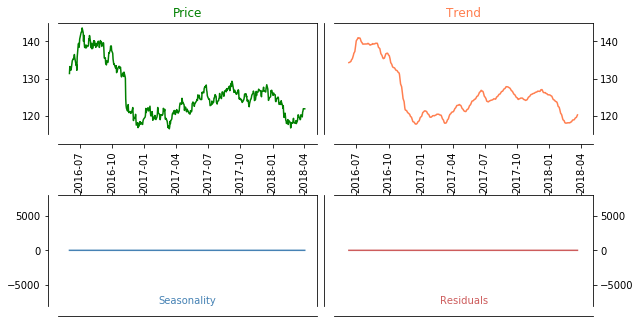

In [17]:
def change_plot(ax): 
    despine(ax) 
    ax.locator_params(axis='y', nbins=5) 
    plt.setp(ax.get_xticklabels(), rotation=90, ha='center') 
 
plt.figure(figsize=(9,4.5)) 
 
plt.subplot(221) 
plt.plot(price, color='Green') 
change_plot(plt.gca()) 
plt.title('Price', color='Green') 
xl = plt.xlim() 
yl = plt.ylim() 
 
plt.subplot(222) 
plt.plot(price.index,price_trend,  
         color='Coral') 
change_plot(plt.gca()) 
plt.title('Trend', color='Coral') 
plt.gca().yaxis.tick_right() 
plt.gca().yaxis.set_label_position("right") 
plt.xlim(xl) 
plt.ylim(yl) 
 
plt.subplot(223) 
plt.plot(price.index,price_seasonal,  
         color='SteelBlue') 
change_plot(plt.gca()) 
plt.gca().xaxis.tick_top() 
plt.gca().xaxis.set_major_formatter(plt.NullFormatter()) 
plt.xlabel('Seasonality', color='SteelBlue', labelpad=-20) 
plt.xlim(xl) 
plt.ylim((-8000,8000)) 
 
plt.subplot(224) 
plt.plot(price.index,price_residual, 
         color='IndianRed') 
change_plot(plt.gca()) 
plt.xlim(xl) 
plt.gca().yaxis.tick_right() 
plt.gca().yaxis.set_label_position("right") 
plt.gca().xaxis.tick_top() 
plt.gca().xaxis.set_major_formatter(plt.NullFormatter()) 
plt.ylim((-8000,8000)) 
plt.xlabel('Residuals', color='IndianRed', labelpad=-20) 
 
plt.tight_layout() 
plt.subplots_adjust(hspace=0.55) 